###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2015 Franco N. Bellomo, Lucas Bellomo

## Método Explicito

Con la discretización que realiamos llegamos a que:

\begin{equation}
\dfrac{T_{i}^{n+1}-T_{i}^{n}}{\Delta t} = \kappa \dfrac{T_{i+1}-2T_{i}+T_{i-1}}{\Delta z^{2}}+ \dfrac{A_{0}e^{-\tfrac{z}{L}}}{\rho C}
\end{equation}
 
Ahora, podemos pensar que todos las temperaturas del termino de la derecha de la ecuación anterior estan en un tiempo $t = n+1$. Luego, de la ecuación anterior podemos despejar $T_{i}^{n+1}$
 
Y despejando, nos queda:
 
\begin{equation}
T_{i}^{n+1}=T_{i}^{n}+\kappa\dfrac{\Delta t}{\Delta z^{2}}\left(T_{i+1}^{n}-2T_{i}^{n}+T_{i-1}^{n}\right)+\Delta t\dfrac{A_{0}e^{-\tfrac{z}{L}}}{\rho C}
\end{equation}

Entonces, necesitamos los tres puntos anteriores para calcular un punto nuevo temporalmente.  
Para nuestro caso, el primer y el ultimo punto de nuestra discretización espacial son las condiciones de contorno, que en nuestro caso son constantes.
 
##Estabilidad de la ecuación de difusión.
 
Para esta ecuación la condición de estabilidad [CFL](https://en.wikipedia.org/wiki/Courant%E2%80%93Friedrichs%E2%80%93Lewy_condition) viene dada por:
 
\begin{equation}
\kappa \dfrac{\Delta t}{\Delta z^{2}} \leq \frac{1}{2}
\end{equation}

Imports básicos

In [1]:
import numpy as np

%matplotlib inline

import time

##Implementación

Como el código *solve_explicit* tiene muchas lineas, lo pusimos en un archivo aparte y simplemente lo importamos.

Realizamos 3 implementaciones del mismo método (explicito) que corren en un solo CPU. Estas son:

* **explicito_py**: Una implementación puramente en python
* **explicito_numba**: Hacemos uso de [numba](http://numba.pydata.org)
* **explicito_sciling**: Usando [NumPy](http://www.numpy.org/) y trabajamos los array de forma vectorial

La función *solve_explicit* tiene por default todos los parámetros ya cargados, pero los podemos cambiar a estos valores cuando llamamos a la función. Por ej: para usar otro $\Delta z$ hacemos *solve_explicit(dz = 50)*. Ademas podemos decirle con que implementación queremos que sea resuelto.  
Ademas, definimos otra función llamada *pretty_plot*  que toma como entrada la salida de la función anterior y grafíca los resultados.

In [2]:
from trasferencia_calor import solve_explicit, pretty_plot

###Primeras pruebas

In [3]:
T_out, prop = solve_explicit(dz=100, amount_plot=10)

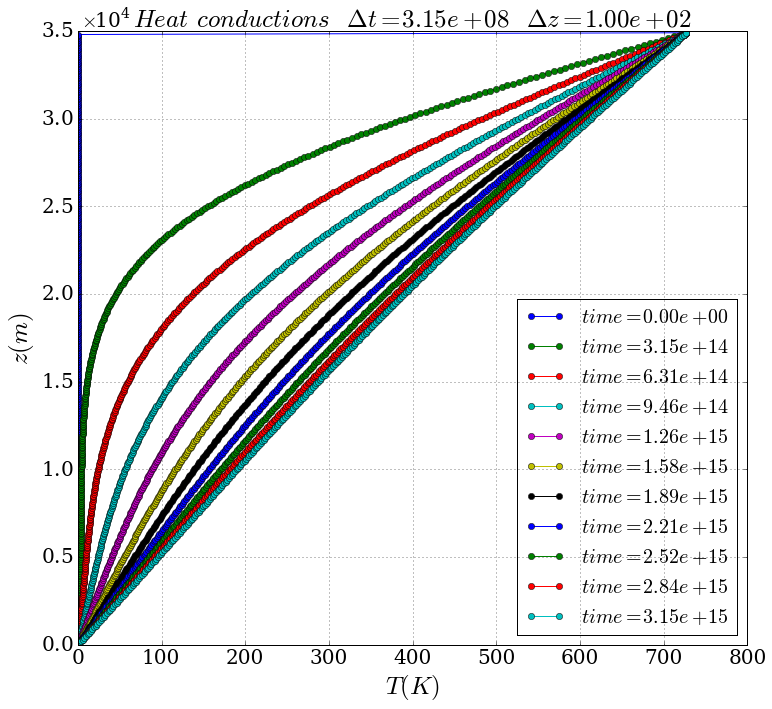

In [4]:
pretty_plot(T_out, prop, '-o')

La funcion *solve_explicito* nos devuelve dos cosas. Una son los array de temperatura para distintos tiempo, y lo otro es un diccionario de los valores usados para el calculo de la solución numérica.

In [5]:
prop

{'amount_plot': 11,
 'dt': 315360000.0,
 'dz': 100,
 'nt': 1000000,
 'nz': 350,
 't_total': 315360000000000.0,
 'z': 35000}

###Mediendo los tiempos

In [6]:
dz_1 = [1800, 1600, 1400, 1200, 1000, 800, 600, 400]
dz_3 = [1800, 1600, 1400, 1200, 1000, 800, 600, 400, 200, 100, 80]
dz_2 = [1800, 1600, 1400, 1200, 1000, 800, 600, 400, 200, 100, 80, 
                 70, 60, 50, 40, 30, 20]
dz_array = [dz_1, dz_2, dz_3]
metodos= ['explicit_py', 'explicit_numba', 'explicit_slicing']

times = [[] for i in range(len(metodos))]

for i in range(len(metodos)):
    for j in range(len(dz_array[i])):
        a = time.time()
        u, prop = solve_explicit(dz=dz_array[i][j], metodo=metodos[i])
        b = time.time()
        times[i].append(b-a)

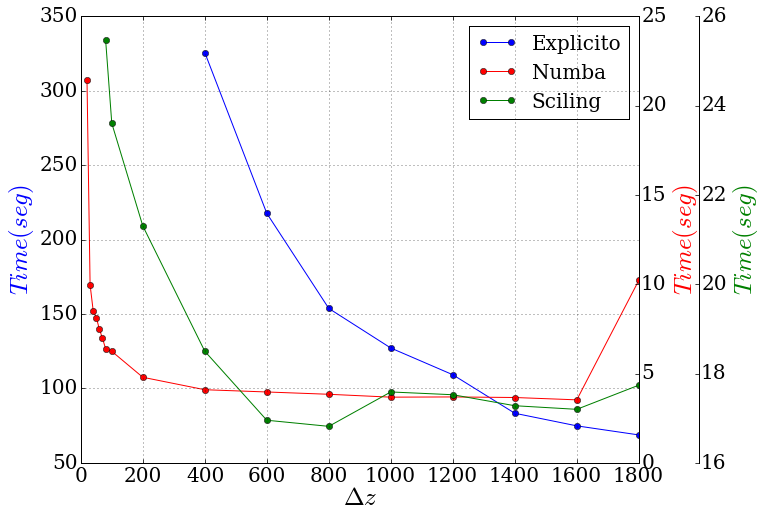

In [7]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

if 1:
    plt.figure(figsize=[10,8])
    host = host_subplot(111, axes_class=AA.Axes)
    
    par1 = host.twinx()
    par2 = host.twinx()

    offset = 60
    new_fixed_axis = par2.get_grid_helper().new_fixed_axis
    par2.axis["right"] = new_fixed_axis(loc="right",
                                        axes=par2,
                                        offset=(offset, 0))

    par2.axis["right"].toggle(all=True)

    host.set_xlabel(r'$\Delta z$')
    host.set_ylabel('$Time(seg)$')
    par1.set_ylabel('$Time(seg)$')
    par2.set_ylabel('$Time(seg)$')

    p1, = host.plot(dz_array[0], times[0], 'o-', label="Explicito", color='blue')
    p2, = par1.plot(dz_array[1], times[1], 'o-', label="Numba", color='red')
    p3, = par2.plot(dz_array[2], times[2], 'o-', label="Sciling", color='green')

    host.legend()

    host.axis["left"].label.set_color(p1.get_color())
    par1.axis["right"].label.set_color(p2.get_color())
    par2.axis["right"].label.set_color(p3.get_color())

    plt.draw()
    plt.grid(True)
    
    plt.show()

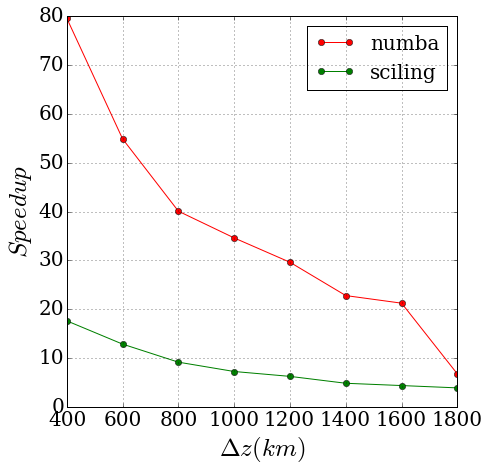

In [8]:
up_numba= []
up_sciling = []
for i in range(len(dz_1)):
    up_numba.append(times[0][i]/times[1][i])
    up_sciling.append(times[0][i]/times[2][i])
    
fig, ax = plt.subplots(figsize=(7,7))
plt.plot(dz_1, up_numba, '-o', label='numba', color='red')
plt.plot(dz_1, up_sciling, '-o', label='sciling', color='green')
plt.xlabel(r'$\Delta z(km)$')
plt.ylabel(r'$Speedup$')
plt.legend(loc = 'best')
plt.grid(True)

Viendo el gran speedup obtenido por el uso de Numba, podemos correr otra simulación con un $\Delta z$ mucho más chico que el inicial.

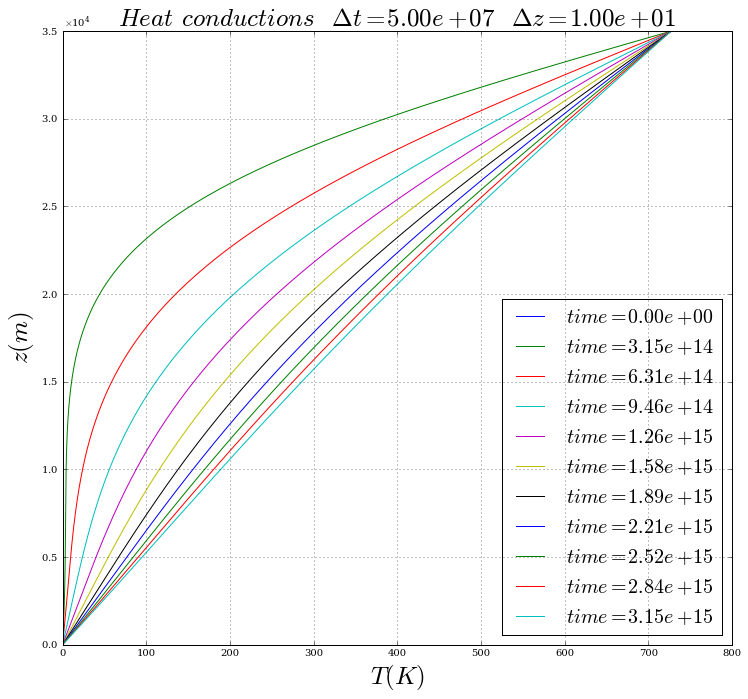

In [8]:
T_out, prop = solve_explicit(dz=10, amount_plot=10, metodo='explicit_numba')
pretty_plot(T_out, prop)

Observar que en esta ultima simulación, logramos bajar 2 ordenes de magnitud en $\Delta z$ (de 1800 a 10) y un orden de magnitud en $\Delta t$ (de $10^{8}$ a $10^{7}$).  

Siguiente paso: **[Método Implicito](http://nbviewer.ipython.org/github/pewen/transferencia_calor/blob/master/Notebooks/2.0_Implicito.ipynb)**

######The cell below loads the style of the notebook.

In [1]:
#Este asombroso css es trabajo de @LorenaABarba
from IPython.core.display import HTML
css_file = './style/css/IPython_personal_style.css'
HTML(open(css_file, "r").read())